# Fáza 1 - Prieskumná analýza

## EDA vizualizácia

Než začneme so samotnou analýzou a jej vizualizáciou, najskôr je potrebné naimportovať si nejaké knižnice.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import skew


### Analýza súborov

- Pracujeme s tromi __.csv__  súbormi, kde jednotlivé atribúty sú oddelené __tabulátormi__. Súbory máme udržované v nasledovnej štruktúre:

  - EDA.ipynb
  - resources
    * user.csv
    * product.csv
    * session.csv
- Daná štruktúra predstavuje __hierarchické usporiadanie__ súborov v našom projektovom adresári. Teraz si môžeme vytvoriť konštantné premenné
  predstavujúce relatívne cesty pre neskoršiu manipuláciu so súbormi:

In [4]:
PRODUCT_FILE_PATH = "resources/product.csv"
USER_FILE_PATH = "resources/user.csv"
SESSION_FILE_PATH = "resources/session.csv"

#### Vzťahy medzi súbormi
- Máme celkovo 3 súbory. Keď sa pozrieme na vzťah medzi jedným používateľom a produktom, tak možno usúdiť, že ide o vzťah typu
  __many-to-many__, nakoľko jeden používateľ môže (ne)kúpiť 0 a viac produktov a jeden produkt môže byť viazaný s viacerými používateľmi, ktorí si ho
  nekúpili. Je preto nutné vytvoriť spojovací súbor, ktorý bude obsahovať záznamy s referenciami na užívateľov aj na produkty. To predstavuje práve súbor session.csv, ktorý okrem product_ean a user_id obsahuje aj údaje o interakcii užívateľa s konkrétnym produktom.

### Analýza záznamov

- Jednotlivé záznamy sú uchovávané v .csv súboroch a oddelovač atribútov je tabulátor. Jeden riadok bude teda predstavovať jeden záznam a hodnoty oddelené tabulátorom budú hodnoty pre konkrétny atribút (stĺpec). Pre zistenie počtu záznamov potrebujeme najskôr každý súbor otvoriť a získať tak aj premennú pre dataset:

In [5]:
df_pro = pd.read_csv(PRODUCT_FILE_PATH, delimiter='\t')
df_usr = pd.read_csv(USER_FILE_PATH, delimiter='\t')
df_sess = pd.read_csv(SESSION_FILE_PATH, delimiter='\t')

- Teraz možno jednoducho použiť funkciu len() a vypísať výsledky:

In [7]:
df_pro_len = len(df_pro)
df_usr_len = len(df_usr)
df_sess_len = len(df_sess)

print(f'Počet produktov: {df_pro_len}')
print(f'Počet používateľov: {df_usr_len}')
print(f'Počet interakcií: {df_sess_len}')

Počet produktov: 14967
Počet používateľov: 2533
Počet interakcií: 11099


- Na zistenie počtu a typov atribútov môžeme využiť nasledovné funkcie:

In [8]:
print(f'Number of attributes for product.csv: {df_pro.shape[1]}')
print(f'Number of attributes for user.csv: {df_usr.shape[1]}')
print(f'Number of attributes for session.csv: {df_sess.shape[1]}')
      
df_pro.dtypes

Number of attributes for product.csv: 4
Number of attributes for user.csv: 11
Number of attributes for session.csv: 25


location       object
product_ean     int64
store_name     object
code           object
dtype: object

In [37]:
df_usr.dtypes

address             object
name                object
race                object
registration        object
username            object
current_location    object
sex                 object
birthdate           object
mail                object
user_id              int64
job                 object
dtype: object

In [38]:
df_sess.dtypes

browser_name                       object
pct_input                         float64
wild_mouse_duration               float64
pct_scroll_move_duration          float64
pct_wild_mouse                    float64
session_start                      object
pct_doubleclick                   float64
pct_rage_click                    float64
pct_click                         float64
page_activity_duration            float64
product_ean                         int64
pct_scrandom                      float64
mouse_move_total_rel_distance     float64
pct_click_product_info            float64
scroll_move_total_rel_distance    float64
session_id                          int64
pct_mouse_click                   float64
pct_scroll_move                   float64
user_id                             int64
screen_width                       object
session_duration                  float64
screen_height                      object
total_load_time                   float64
ack                               

- Sem ešte doplniť nejakú analýzu typov dát

### Analýza atribútov
- Teraz analyzujeme niektoré významné atribúty a ukážeme ich distribúcie a iné deskriptívne štatistiky.


#### Analýza pohlaví
- Pri analýze distribúcii jednotlivých pohlaví sme museli vylúčiť nešpecifikované hodnoty pri atribúte pohlavie.

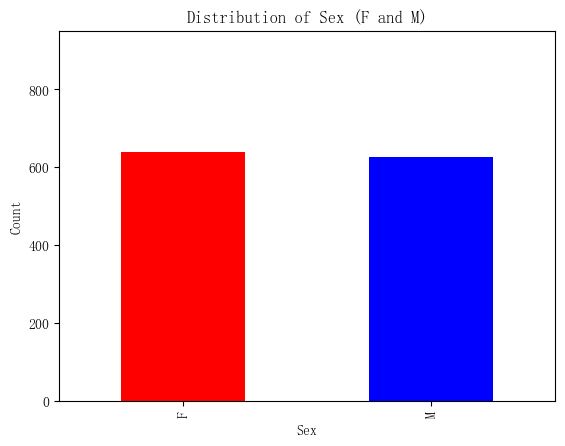

In [51]:
sex_counts = df_usr['sex']

sex_counts_f = sex_counts.dropna(how='any').value_counts()

sex_counts_f.plot(kind='bar', color=['red', 'blue'], alpha=1)
plt.ylim(0, 950)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex (F and M)')
plt.show()


#### Analýza lokácií produktov
- V tejto časti analyzujeme distribúcie krajín, ktoré vyrabájú dané produkty. Pre prehľadnosť sme sa rozhodli obmedziť výsledky len na top 30 krajín.

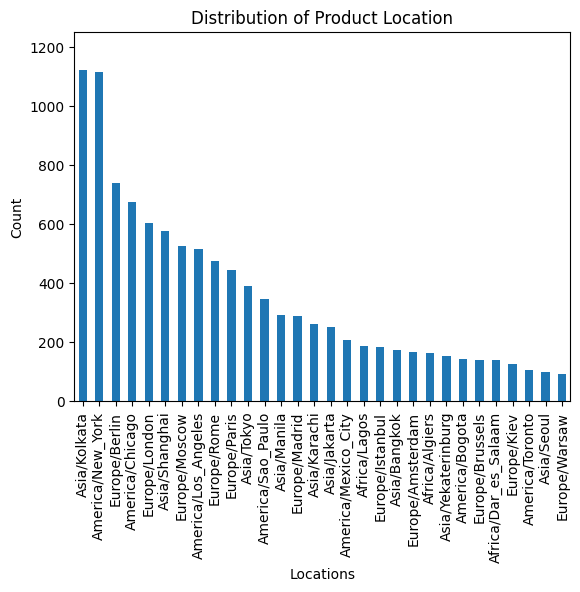

In [15]:
loc_counts = df_pro['location'].value_counts().head(30)

loc_counts.plot(kind='bar', alpha=1)
plt.ylim(0, 1250)
plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Distribution of Product Location')
plt.show()

#### Analýza distribúcie zamestnaní


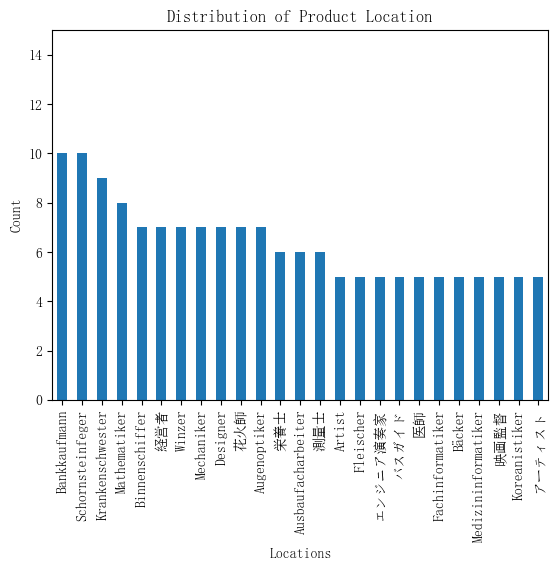

In [15]:
job_counts = df_usr['job'].value_counts().head(25)
job_counts

plt.rcParams['font.family'] = 'SimSun'

job_counts.plot(kind='bar', alpha=1)
plt.ylim(0, 15)
plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Distribution of Product Location')
plt.show()

#### Analýza distribúcie veku



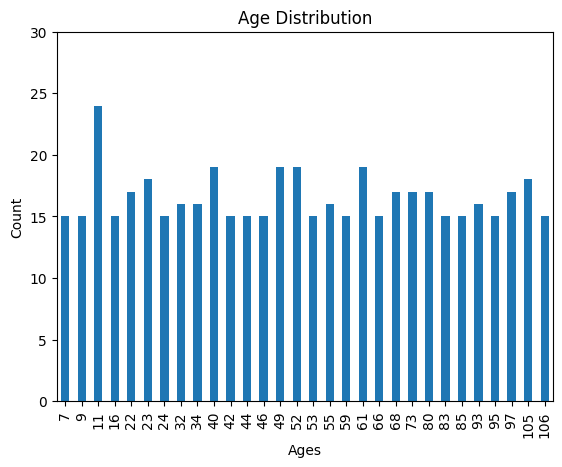

In [7]:
import pandas as pd
from datetime import datetime

df_ages = pd.DataFrame({'user_id' : df_usr['user_id'],
                    'age': (datetime.now() - pd.to_datetime(df_usr['birthdate'].dropna(how="any"), format='%Y-%m-%d'))
                    .apply(lambda x: x.days // 365) }).dropna(how="any")

#df2
age_counts = df_ages['age'].value_counts().head(30).sort_index()
age_counts.index = age_counts.index.astype(int)
age_counts
age_counts.plot(kind='bar', alpha=1)
plt.ylim(0, 30)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Analýza aktivity užívateľov na stránkach
- V tejto časti skúmame aktivitu používateľov na stránkach z hľadiska veku. Využívame pritom predchádzajúci dataset, ktorý obsahuje user_id a vypočítaný vek na základe dátumu narodenia.

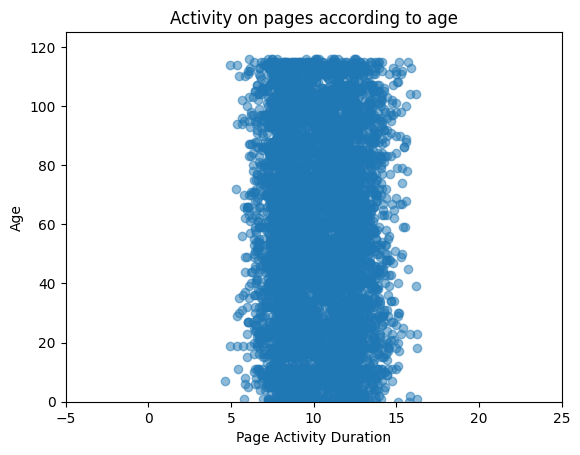

In [21]:
#user_age_subset = original_df[['user_id', 'age']]
page_time_subset = df_sess[['user_id', 'page_activity_duration']].dropna(how="any")
merged_df = df_ages.merge(page_time_subset, on='user_id', how='inner')

plt.scatter(merged_df['page_activity_duration'], merged_df['age'], alpha=0.5)
plt.xlabel('Page Activity Duration')
plt.ylabel('Age')
plt.title('Activity on pages according to age')

plt.xlim(-5, 25)
plt.ylim(0, 125)

plt.show()

### Párová analýza
- V tejto časti skúmame závislosti medzi rôznymi dvojicami dát. Na začiatok využijeme predchádzajúci spojený dataset a zistíme koreláciu medzi vekom a ktivitou na stránkach. Budeme počítať dva typy korelácií, jednu od Pearsona a druhú od Spearmana.

In [34]:
# Calculate the Pearson correlation coefficient
pearson_corr = merged_df['age'].corr(merged_df['page_activity_duration'], method='pearson')

# Calculate the Spearman rank correlation coefficient
spearman_corr = merged_df['age'].corr(merged_df['page_activity_duration'], method='spearman')

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

covariance = np.cov(merged_df['page_activity_duration'], merged_df['age'])[0, 1]
print(f'Covariance: {covariance}')

Pearson Correlation: -0.012794121793224715
Spearman Correlation: -0.013372028065433894
Covariance: -0.9064935671451997


- Z výsledkov možno pozorovať, že korelácia je v oboch prípadoch takmer nulová. To znamená, že aktivita nema tendenciu ani rásť s ratúcim vekom, ani klesať s klesajúcím. Nemá tendenciu ani klesať s rastúcim ani rásť s klesajúcim. Už z predchádzajúceho grafu vidieť, že hodnota aktivity sa drží medzi 10 až 11.Skúsme vypočítať štandardnú odchýlku:

In [39]:
print(f"Standard dev: {merged_df['page_activity_duration'].std()}")


Standard dev: 2.119438982897867


- Z grafu takisto vyplýva, že vek by aj mohol mať normálne rozdelenie hodnôt. Je, ale pravda, že nemá skoro žiadne chvosty. Môžme preto preskúmať ešte ďalšie vlastnosti na overenie vlastností normálneho rozdelenia.
#### Skewness a Kurtosis

In [28]:
skew(merged_df['age'])

0.04727618512628633

In [29]:
merged_df['age'].kurtosis()

-1.186359347837261

- Z daných hodnôt vyplýva, že rozdelenie je celkom pekne rozdistribuované na ľavú aj pravú stranu, je iba mierne naklonené na ľavú stranu. Avšak hodnota
pre druhú vlastnosť jasne ukazuje, že rozdelenie má nižší vrch a menšie chvosty ako normálne rozdelenie.

## Identifikácia problémov v dátach
- V daných datasetoch sme identifikovali niekoľko problémov:

        a) Chýbajúce dáta, napriklad pri pohlaví, dátume narodenia, zamestnaní
        b) Nejdnotný formát pri zamestnaní (niektoré zamestnania boli uvádzané v čínskych znakoch)
        c)